In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as  plt

In [2]:
input_folder = 'THE1_Images/'
output_folder = 'THE1_Outputs/'

In [3]:
def read_image(filename, gray_scale=False):
    # Read the image in grayscale or color
    if gray_scale:
        img = cv2.imread(input_folder + filename, cv2.IMREAD_GRAYSCALE)
        return img
    img = cv2.imread(input_folder + filename)
    return img


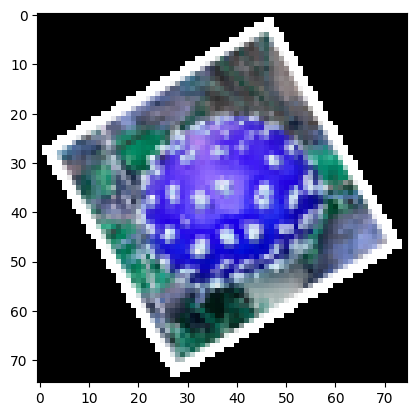

In [4]:
foto = read_image('ratio_4_degree_30.png')
plt.imshow(foto)

In [5]:
def write_image(img, filename):
    # CV2 is just a suggestion you can use other libraries as well
    cv2.imwrite(output_folder+filename, img)

In [6]:
x = read_image("desert1.jpg")
x

array([[[ 59,  80, 111],
        [ 58,  79, 110],
        [ 58,  79, 110],
        ...,
        [ 76,  72,  67],
        [ 71,  67,  62],
        [ 67,  63,  58]],

       [[ 66,  87, 118],
        [ 64,  85, 116],
        [ 64,  85, 116],
        ...,
        [ 73,  69,  64],
        [ 65,  61,  56],
        [ 57,  54,  46]],

       [[ 61,  82, 113],
        [ 60,  81, 112],
        [ 60,  81, 112],
        ...,
        [ 73,  69,  64],
        [ 66,  62,  57],
        [ 59,  54,  51]],

       ...,

       [[ 10,  45,  79],
        [  1,  36,  70],
        [  5,  38,  71],
        ...,
        [ 10,  36,  73],
        [ 10,  41,  80],
        [ 11,  43,  79]],

       [[  9,  46,  80],
        [  0,  35,  69],
        [ 34,  66, 101],
        ...,
        [  5,  33,  68],
        [ 11,  38,  75],
        [ 14,  44,  79]],

       [[  4,  41,  75],
        [  1,  38,  72],
        [ 54,  89, 123],
        ...,
        [  3,  30,  64],
        [  8,  34,  70],
        [ 13,  40,  77]]

In [7]:
x.shape

(430, 512, 3)

In [8]:
def rotate_upsample(img, scale, degree, interpolation_type):
    '''
    img: Image to be rotated and upsampled
    scale: Upsampling scale (e.g., if current width and height is 64x64, and scale is 4,
           the output width and height should be 256x256)
    degree: Degree of rotation (e.g., if degree = 30, the original image was rotated 30 degrees counterclockwise)
    interpolation_type: Type of interpolation ('linear' for bilinear, 'cubic' for bicubic)
    '''

    # Convert BGR image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



    # Determine the interpolation method
    if interpolation_type == 'linear':
        interp = cv2.INTER_LINEAR
    elif interpolation_type == 'cubic':
        interp = cv2.INTER_CUBIC
    else:
        raise ValueError("Interpolation type must be 'linear' or 'cubic'")
    

    # Get the dimensions of the original image
    (h, w) = img.shape[:2]    # h ---> rows    & w ---> columns


    # Upsample the image
    upsampled_img = cv2.resize(img,None, fx= scale,fy=scale, interpolation=interp)

    # Get the center of the image for rotation
    # center_x = w // 2  or center_x = w // 2 - 1   ---> w // 2 is the more common choice 
    center = (int(w * scale) // 2 , int(h * scale) // 2 )  

    # Create the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center=center, angle=-1*degree, scale=1.0)

    # Perform the rotation
    corrected_image = cv2.warpAffine(upsampled_img, rotation_matrix, (int(w * scale), int(h * scale)))

    return corrected_image


In [9]:
image1 = read_image("ratio_4_degree_30.png")
image11 = rotate_upsample(image1, 4, 30, 'linear')
image111 = rotate_upsample(image1, 4, 30, 'cubic')

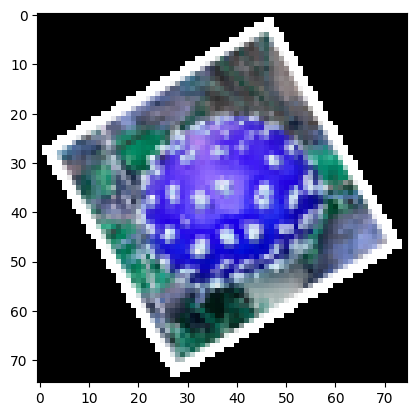

In [10]:
plt.imshow(image1)

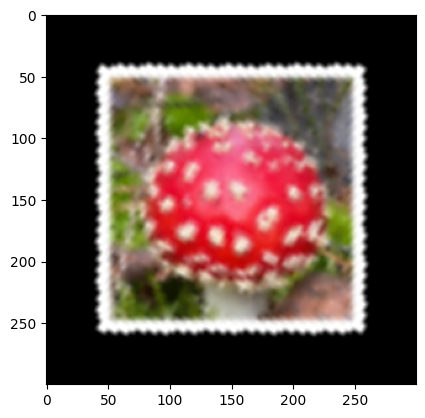

In [11]:
plt.imshow(image11)

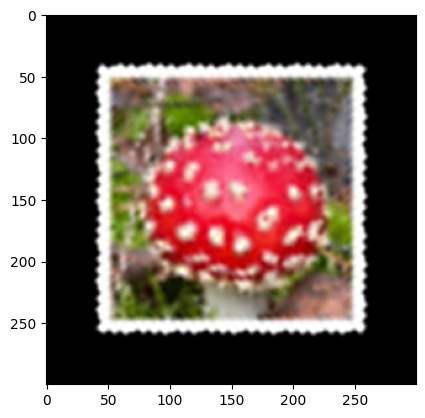

In [12]:
plt.imshow(image111)

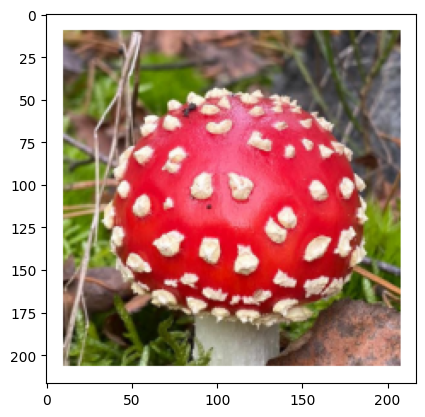

In [13]:
image1_original = read_image('q1_1.png')

# Convert BGR image to RGB
image1_original = cv2.cvtColor(image1_original, cv2.COLOR_BGR2RGB)

plt.imshow(image1_original)

In [14]:
image2 = read_image("ratio_8_degree_45.png")
image21 = rotate_upsample(image2, 8, 45, 'linear')
image211 = rotate_upsample(image2, 8, 45, 'cubic')

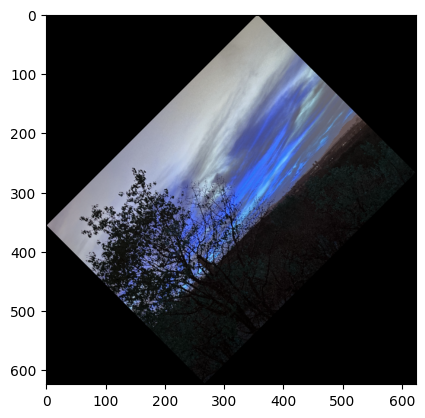

In [15]:
plt.imshow(image2)

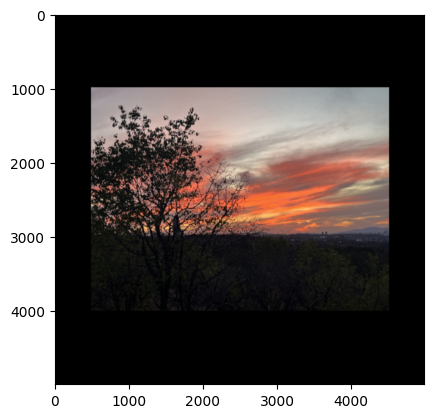

In [16]:
plt.imshow(image21)

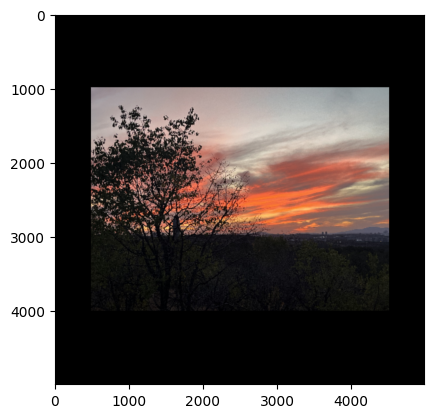

In [17]:
plt.imshow(image211)

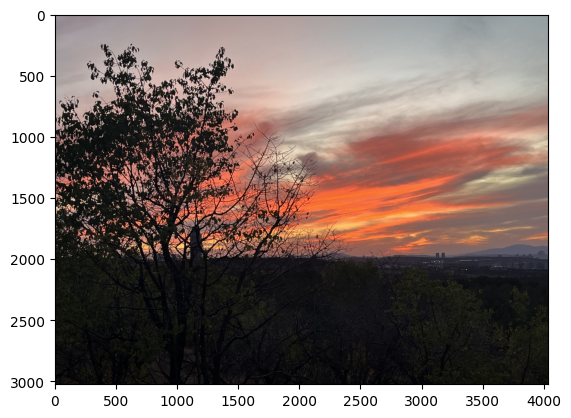

In [18]:
image2_original = read_image('q1_2.png')

# Convert BGR image to RGB
image2_original = cv2.cvtColor(image2_original, cv2.COLOR_BGR2RGB)


plt.imshow(image2_original)

In [19]:
def cropping_way(img1, img2):
    # Get the shape of img1
    img1_rows, img1_columns = img1.shape[:2]
        
    # Get the shape of img2
    img2_rows, img2_columns = img2.shape[:2]

    if img1_rows > img2_rows or img1_columns > img2_columns:
        # Calculate the cropping coordinates for img1
        y_start = (img1_rows - img2_rows) // 2
        x_start = (img1_columns - img2_columns) // 2

        # Crop img1 to match img2's dimensions
        img1_cropped = img1[y_start:y_start + img2_rows, x_start:x_start + img2_columns]
        return img1_cropped,img2
    else:
        # Calculate the cropping coordinates for img2
        y_start = (img2_rows - img1_rows) // 2
        x_start = (img2_columns - img1_columns) // 2

        # Crop img2 to match img1's dimensions
        img2_cropped = img2[y_start:y_start + img1_rows, x_start:x_start + img1_columns]
        return img1,img2_cropped


    


def padding_way(img1, img2):
    """
    Pad the smaller image with a black background to match the dimensions of the larger image.

    Parameters:
    - img1: First image.
    - img2: Second image.

    Returns:
    - padded_img1: Padded first image.
    - padded_img2: Padded second image.
    """

    img1_rows, img1_columns = img1.shape[:2]
    img2_rows, img2_columns = img2.shape[:2]
    max_h = max(img1_rows, img2_rows)
    max_w = max(img1_columns, img2_columns)

    # Create black canvases of the maximum size
    padded_img1 = np.zeros((max_h, max_w, 3), dtype=img1.dtype)
    padded_img2 = np.zeros((max_h, max_w, 3), dtype=img2.dtype)

    # Calculate the coordinates to center each image on the black canvas
    start_y1 = (max_h - img1_rows) // 2
    start_x1 = (max_w - img1_columns) // 2
    start_y2 = (max_h - img2_rows) // 2
    start_x2 = (max_w - img2_columns) // 2

    # Place img1 and img2 on their respective black canvases
    padded_img1[start_y1:start_y1 + img1_rows, start_x1:start_x1 + img1_columns] = img1
    padded_img2[start_y2:start_y2 + img2_rows, start_x2:start_x2 + img2_columns] = img2

    return padded_img1, padded_img2

In [20]:
def compute_distance(img1, img2):
    '''
    Compute the Mean Squared Error (MSE) between two images.
    img1: First image
    img2: Second image (should be of the same size)
    '''
 
    # Ensure both images have the same dimensions
    if img1.shape != img2.shape:
        #img1_new,img2_new = cropping_way(img1, img2)   
        img1_new,img2_new = padding_way(img1, img2)   # better
    else:
        img1_new,img2_new = img1,img2
        

    # Plotting both images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img1_new)
    plt.title('Image 1')
    plt.axis('off')  # Hide axis

    plt.subplot(1, 2, 2)
    plt.imshow(img2_new)
    plt.title('Image 2')
    plt.axis('off')  # Hide axis

    plt.show()
    
    # Compute the Mean Squared Error
    mse = np.mean((img1_new.astype(np.float32) - img2_new.astype(np.float32)) ** 2)
    return mse

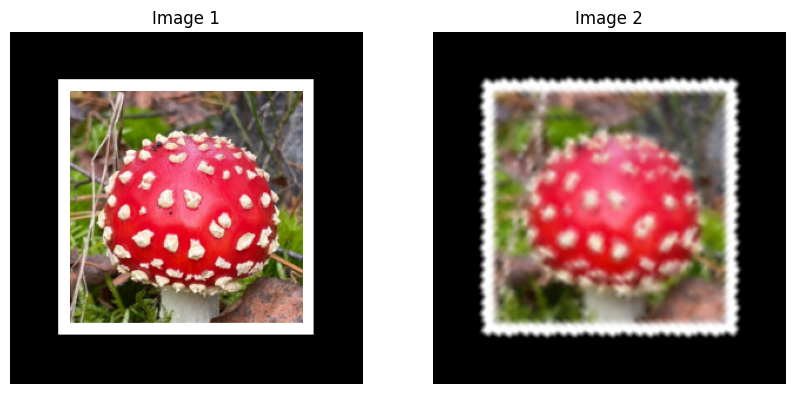

861.81976

In [21]:
compute_distance(image1_original, image11)

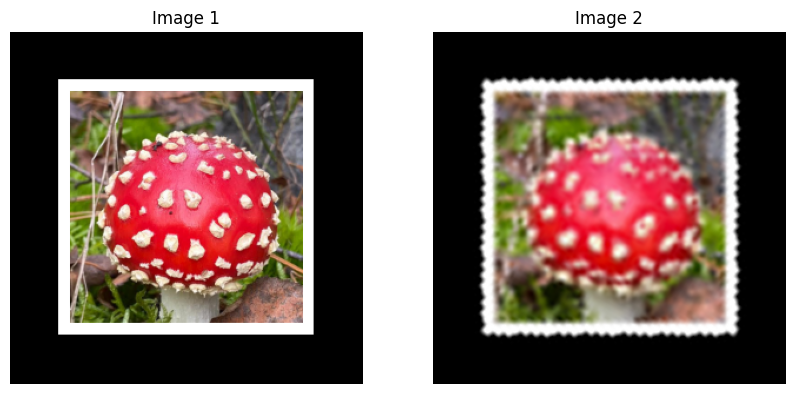

806.43085

In [22]:
compute_distance(image1_original, image111)

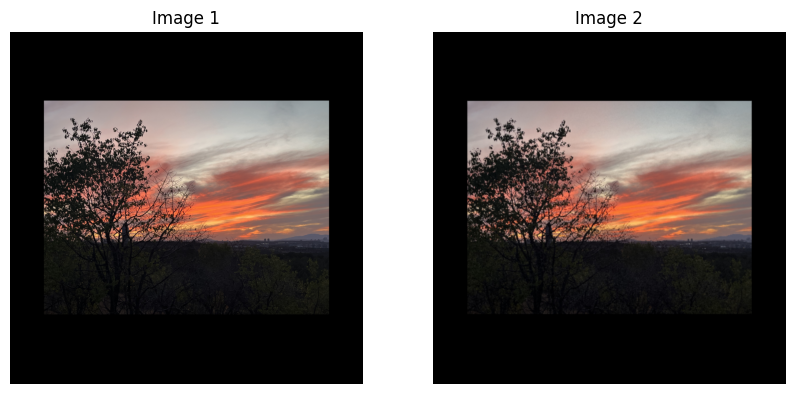

269.13748

In [23]:
compute_distance(image2_original, image21)

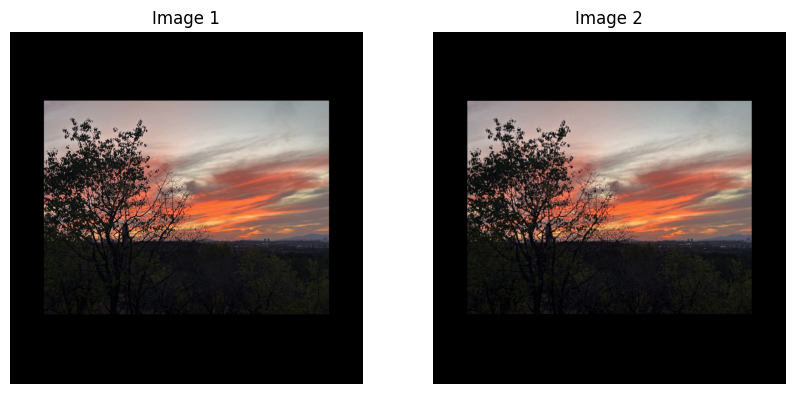

284.18875

In [24]:
compute_distance(image2_original, image211)

In [ ]:
def rgb_to_hsi(image):
    """Convert RGB image to HSI color space."""
    # Normalize the RGB values to [0, 1]
    rgb = image.astype('float') / 255.0
    b, g, r = cv2.split(rgb)

    # Calculate intensity
    I = (r + g + b) / 3.0

    # Calculate hue
    numerator = (r - g) + (r - b)
    denominator = 2 * np.sqrt((r - g) ** 2 + (r - b) * (g - b)) + 1e-10  # Avoid division by zero
    theta = np.arccos(numerator / denominator)
    H = np.zeros_like(I)

    # Assign hue values based on conditions
    H[b <= g] = theta[b <= g]
    H[g < b] = 2 * np.pi - theta[g < b]

    # Calculate saturation
    #S = 1 - (3 / (r + g + b + 1e-10)) * np.minimum(np.minimum(r, g), b)          # (r + g + b + 1e-10)   or I (slides)
    S = 1 - 3 * (np.minimum(r,np.minimum(g,b))) / (I+1e-10)

    # Stack channels to get HSI
    hsi = cv2.merge([H, S, I])
    return hsi


def compute_hue_histogram(hsi, bins=256):   # bins can be change. it depends on the noise
    """Compute the histogram of the hue channel."""
    hue_channel = hsi[:, :, 0]
    hist, _ = np.histogram(hue_channel, bins=bins, range=(0, 2 * np.pi))
    hist = hist.astype('float')
    hist /= hist.sum()  # Normalize the histogram
    return hist




def kl_divergence(p, q):

    # Normalize distributions to ensure they sum to 1
    p = p / np.sum(p) if np.sum(p) > 0 else p
    q = q / np.sum(q) if np.sum(q) > 0 else q
   # RGB values to the range [0, 1]
    # Avoid division by zero in q by clipping
    q = np.clip(q, 1e-10, None)

    # Calculate KL divergence
    divergence = np.sum(np.where(p != 0, p * np.log(p / q+1e-10), 0))

    # Return divergence, ensuring no NaN values are returned
    return divergence if not np.isnan(divergence) else 0


def desert_or_forest(img):
    '''Classify the image as either 'desert' or 'forest'.'''

    # Load database images
    desert1 = read_image('desert1.jpg')
    desert2 = read_image('desert2.jpg')
    forest1 = read_image('forest1.jpg')
    forest2 = read_image('forest2.jpg')

    # Convert images to HSI
    hsi_img = rgb_to_hsi(img)
    hsi_desert1 = rgb_to_hsi(desert1)
    hsi_desert2 = rgb_to_hsi(desert2)
    hsi_forest1 = rgb_to_hsi(forest1)
    hsi_forest2 = rgb_to_hsi(forest2)

    # Compute histograms of the hue channel
    hist_img = compute_hue_histogram(hsi_img)
    hist_desert1 = compute_hue_histogram(hsi_desert1)   # default bins=256 
    hist_desert2 = compute_hue_histogram(hsi_desert2)
    hist_forest1 = compute_hue_histogram(hsi_forest1)
    hist_forest2 = compute_hue_histogram(hsi_forest2)

    # Compute KL Divergence
    kl_desert1 = kl_divergence(hist_img, hist_desert1)
    kl_desert2 = kl_divergence(hist_img, hist_desert2)
    kl_forest1 = kl_divergence(hist_img, hist_forest1)
    kl_forest2 = kl_divergence(hist_img, hist_forest2)

    # Determine which category has the minimum KL divergence
    desert_kl_min = min(kl_desert1,kl_desert2)  
    forest_kl_min = min(kl_forest1,kl_forest2)


    if desert_kl_min < forest_kl_min:
        return 'desert'
    else:
        return 'forest'


In [26]:
image2_1 = read_image("q2_1.jpg")   # desert
print(desert_or_forest(image2_1))

desert


In [27]:
image2_2 = read_image("q2_2.jpg")   # forest
print(desert_or_forest(image2_2))

forest


In [32]:
def compute_hue_histogram(hsi, bins=30):   # Changed bins to 30
    """Compute the histogram of the hue channel."""
    hue_channel = hsi[:, :, 0]
    hist, _ = np.histogram(hue_channel, bins=bins, range=(0, 2 * np.pi))
    hist = hist.astype('float')
    hist /= hist.sum()  # Normalize the histogram
    return hist

In [33]:
image2_1 = read_image("q2_1.jpg")
print(desert_or_forest(image2_1))

image2_2 = read_image("q2_2.jpg")
print(desert_or_forest(image2_2))

desert
forest


In [34]:
image31 = read_image('q3_a1.png')
image32 = read_image('q3_a2.png')
image33 = read_image('q3_b1.png')
image34 = read_image('q3_b2.png')

In [39]:
def difference_images_gray(img1, img2, threshold=75):
    '''img1 and img2 are the images to take the difference from.
    returns the masked image where the object is highlighted.'''

    # Convert images to grayscale if they are not already
    if len(img1.shape) == 3:
        img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    else:
        img1_gray = img1

    if len(img2.shape) == 3:
        img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    else:
        img2_gray = img2

    # Compute the absolute difference between the two images
    diff = cv2.absdiff(img1_gray, img2_gray)

    # Apply a binary threshold to the difference image
    _, mask = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

    # Create a masked image where the object is highlighted
    masked_image = cv2.bitwise_and(img2, img2, mask=mask.astype(np.uint8))

    return masked_image


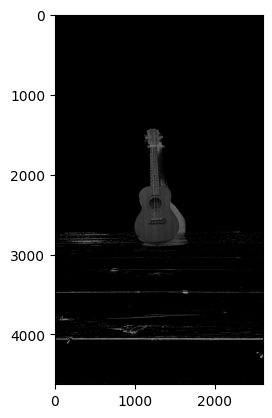

In [40]:
output_img = difference_images_gray(image31,image32,threshold=30)  # not good
plt.imshow(output_img)

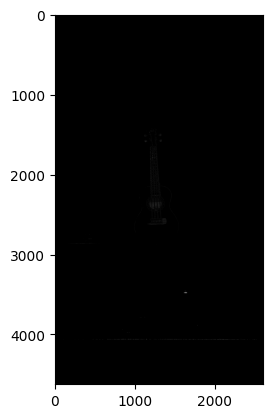

In [41]:
output_img = difference_images_gray(image31,image32,threshold=100)   # not good
plt.imshow(output_img)

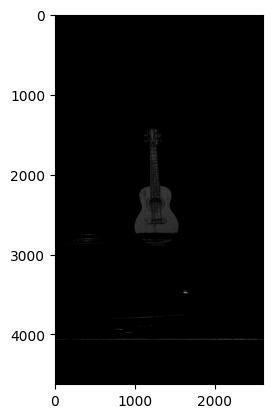

In [55]:
output_img = difference_images_gray(image31,image32,threshold=75)  # good (expecting_output)
plt.imshow(output_img)

In [43]:
def difference_images_rgb(img1, img2, threshold= 50):
    """
    Find differences between two RGB images focusing on red channel differences.
    
    Parameters:
    img1: First RGB image (without object)
    img2: Second RGB image (with object)
    
    Returns:
    result: Original image with only the different object visible
    """
    # Split the images into RGB channels
    b1, g1, r1 = cv2.split(img1)
    b2, g2, r2 = cv2.split(img2)
    
    # Calculate differences in each channel
    diff_r = cv2.absdiff(r2, r1)
    diff_g = cv2.absdiff(g2, g1)
    diff_b = cv2.absdiff(b2, b1)
    
    # Give more weight to red channel
    diff_weighted = cv2.addWeighted(diff_r, 0.5, diff_g, 0.25, 0)
    diff_weighted = cv2.addWeighted(diff_weighted, 1.0, diff_b, 0.25, 0)
    
    
    _, mask = cv2.threshold(diff_weighted, threshold , 255, cv2.THRESH_BINARY)
    
    # Clean up mask using morphological operations
    kernel = np.ones((11,11), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Apply mask to original image using bitwise_and
    result = cv2.bitwise_and(img2, img2, mask=mask)
    
    return result

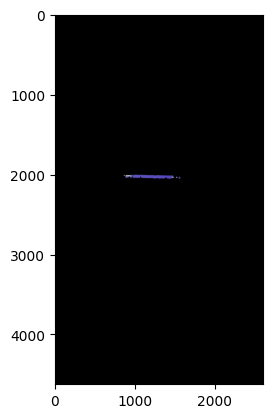

In [45]:
output_img2 = difference_images_rgb(image33,image34,threshold= 50)   # good threshold
plt.imshow(output_img2)

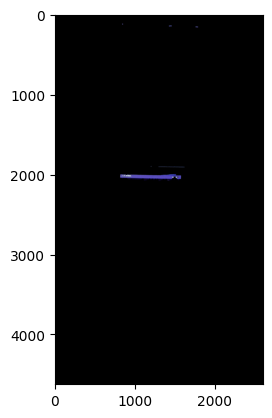

In [ ]:
output_img2 = difference_images_rgb(image33, image34, threshold= 30)  # not good
plt.imshow(output_img2)

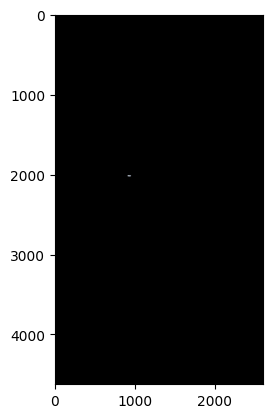

In [49]:
output_img2 = difference_images_rgb(image33,image34,threshold=70) # bad
plt.imshow(output_img2)

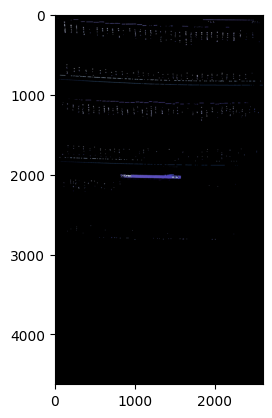

In [50]:
def difference_images_rgb(img1, img2, threshold= 50):  # for best threshold finding kernel
    """
    Find differences between two RGB images focusing on red channel differences.
    
    Parameters:
    img1: First RGB image (without object)
    img2: Second RGB image (with object)
    
    Returns:
    result: Original image with only the different object visible
    """
    # Split the images into RGB channels
    b1, g1, r1 = cv2.split(img1)
    b2, g2, r2 = cv2.split(img2)
    
    # Calculate differences in each channel
    diff_r = cv2.absdiff(r2, r1)
    diff_g = cv2.absdiff(g2, g1)
    diff_b = cv2.absdiff(b2, b1)
    
    # Give more weight to red channel
    diff_weighted = cv2.addWeighted(diff_r, 0.5, diff_g, 0.25, 0)
    diff_weighted = cv2.addWeighted(diff_weighted, 1.0, diff_b, 0.25, 0)
    
    
    _, mask = cv2.threshold(diff_weighted, threshold , 255, cv2.THRESH_BINARY)
    
    # Clean up mask using morphological operations
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Apply mask to original image using bitwise_and
    result = cv2.bitwise_and(img2, img2, mask=mask)
    
    return result



output_img2 = difference_images_rgb(image33,image34)
plt.imshow(output_img2)

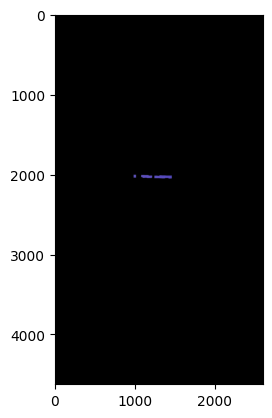

In [52]:
def difference_images_rgb(img1, img2, threshold= 50):
    """
    Find differences between two RGB images focusing on red channel differences.
    
    Parameters:
    img1: First RGB image (without object)
    img2: Second RGB image (with object)
    
    Returns:
    result: Original image with only the different object visible
    """
    # Split the images into RGB channels
    b1, g1, r1 = cv2.split(img1)
    b2, g2, r2 = cv2.split(img2)
    
    # Calculate differences in each channel
    diff_r = cv2.absdiff(r2, r1)
    diff_g = cv2.absdiff(g2, g1)
    diff_b = cv2.absdiff(b2, b1)
    
    # Give more weight to red channel
    diff_weighted = cv2.addWeighted(diff_r, 0.5, diff_g, 0.25, 0)
    diff_weighted = cv2.addWeighted(diff_weighted, 1.0, diff_b, 0.25, 0)
    
    
    _, mask = cv2.threshold(diff_weighted, threshold , 255, cv2.THRESH_BINARY)
    
    # Clean up mask using morphological operations
    kernel = np.ones((25,25), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Apply mask to original image using bitwise_and
    result = cv2.bitwise_and(img2, img2, mask=mask)
    
    return result



output_img2 = difference_images_rgb(image33,image34)
plt.imshow(output_img2)

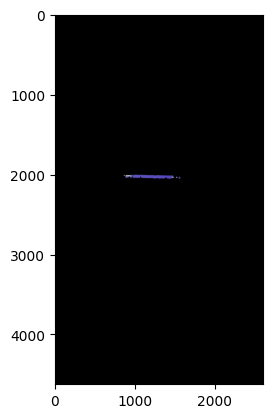

In [ ]:
# the best is threshold=50 and kernel=(11,11)
def difference_images_rgb(img1, img2, threshold= 50):
    """
    Find differences between two RGB images focusing on red channel differences.
    
    Parameters:
    img1: First RGB image (without object)
    img2: Second RGB image (with object)
    
    Returns:
    result: Original image with only the different object visible
    """
    # Split the images into RGB channels
    b1, g1, r1 = cv2.split(img1)
    b2, g2, r2 = cv2.split(img2)
    
    # Calculate differences in each channel
    diff_r = cv2.absdiff(r2, r1)
    diff_g = cv2.absdiff(g2, g1)
    diff_b = cv2.absdiff(b2, b1)
    
    # Give more weight to red channel
    diff_weighted = cv2.addWeighted(diff_r, 0.5, diff_g, 0.25, 0)
    diff_weighted = cv2.addWeighted(diff_weighted, 1.0, diff_b, 0.25, 0)
    
    
    _, mask = cv2.threshold(diff_weighted, threshold , 255, cv2.THRESH_BINARY)
    
    # Clean up mask using morphological operations
    kernel = np.ones((11,11), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Apply mask to original image using bitwise_and
    result = cv2.bitwise_and(img2, img2, mask=mask)
    
    return result



output_img2 = difference_images_rgb(image33,image34)
plt.imshow(output_img2)